# Intro

I am going to say it upfront I hate PowerPoint. Probably because I don't like to present in front of people. I am more of a Word person, or in this case jupyter notebook. However, there are situations when the only choice you have is to create a PowerPoint presentation. And what if on top of that you need to present some results of your awesome deep learning algorithm that segments something on different images. You might say that comet.ml or Weights and Biases are more suitable for this type of issue. That is true, they are, but your dataset is private and the company you are working for didn't buy a corporate subscription because, well, it's best not to get into details. So, you're stuck! You need to painstakingly print screen the input images, the ground truth mask and the predicted mask. For several images. One or two times you do it, but as you need to test different models and maybe compare them you get bored and you start to wonder if there is a better way to do it. It is! [`python-pptx`](https://python-pptx.readthedocs.io/en/latest/user/install.html#install) is packgage that can be used to present the results of a segmentation model instead of doing print screens. Let's see how! 

We'll start simple and in a next part we'll see how can we rewrite the code in a better way. We'd rather spend more time writing code than in a PowerPoint presentation, right?

![](images/public_speaking.jpg)

# Create just a slide

We'll first create a presentation with just one slide, and dummy images and segmentation masks. The slide will also contain a text box with the image path. 

## Import libraries

In [1]:
import pathlib as pt

import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from pptx import Presentation
from pptx.util import Inches, Pt


## Create the presentation with one slide

In [2]:
prs = Presentation()

# slide dimensions
prs.slide_width = Inches(16)
prs.slide_height = Inches(9)

# add a blank slide, this is the 6th layout from all avaiable by default
slide = prs.slides.add_slide(prs.slide_layouts[6])

Let see what image we'll display on the slide

Image dimensions: (753, 600, 3)


(-0.5, 599.5, 752.5, -0.5)

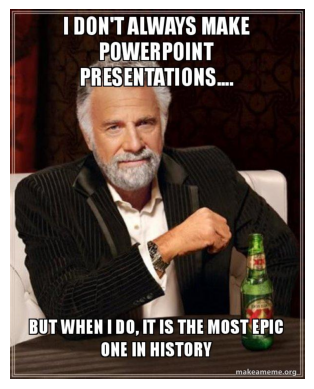

In [3]:
img_path = pt.Path("images/power_point_meme.jpg")

img = iio.imread(img_path)
print(f"Image dimensions: {img.shape}")
plt.imshow(img)
plt.axis('off')

Next, we'll create some dummy prediction and ground truth images which should have the same size as the input image.

(-0.5, 599.5, 752.5, -0.5)

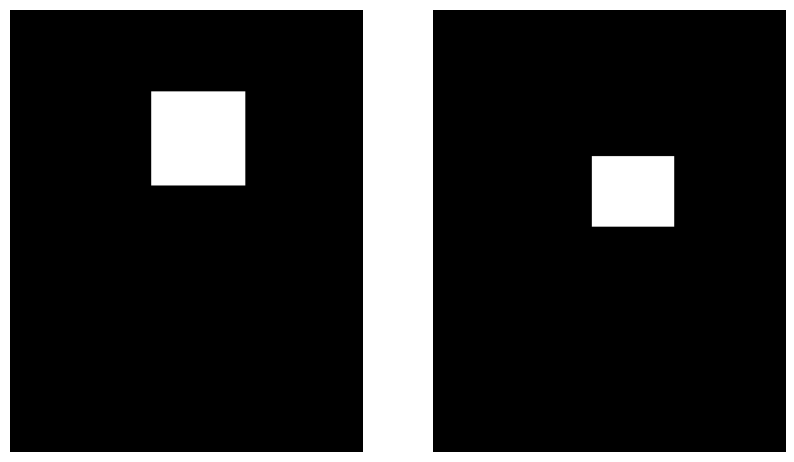

In [4]:
pred_img = np.zeros_like(img)
pred_img[140:300, 240:400] = 255
pred_path = img_path.parent/"pred.png"
iio.imwrite(pred_path, pred_img)

gt_img = np.zeros_like(img)
gt_img[250:370, 270:410] = 255
gt_path = img_path.parent/"gt.png"
iio.imwrite(gt_path, gt_img)

fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(pred_img, cmap='grey')
ax[0].axis('off')
ax[1].imshow(gt_img, cmap='grey')
ax[1].axis('off')



We have a presentation with a slide and the 3 images that should appear. At first let's see how we add only one image.

In [5]:
# add a picture shape positioned in the top left corner of slide in this case
# by specifying just the height, the width is automatically adjusted to preserve the aspect ratio

slide.shapes.add_picture(str(img_path), left=Inches(0), top=Inches(0), height=Inches(5))

# save the presentation to see the result
filename_prs = "model1_preds.pptx"
prs.save(filename_prs)

After this step the slide should look something like the one below. And yes, I did a print screen. 

![](images/ppt_slide1.png)

We'll now add the other two images we saved and a text box. The images we'll be arranged on one row with some space between them, while the text box we'll be in the top left corner of the slide. But, first let's create a new slide, not to overwrite this one. Or re-create the presentation.

In [6]:
slide2 = prs.slides.add_slide(prs.slide_layouts[6])

# Create a text box
txt_box = slide2.shapes.add_textbox(left=Inches(0), top=Inches(0), width=Inches(2), height=Inches(0.5))
tf = txt_box.text_frame

# By default the text frame contains already a paragraph with a new line. Clear it out and add our text
tf.clear()
p = tf.paragraphs[0]
p.text = str(img_path)
p.font.size = Pt(30)

In [7]:
# Define the space between the images
space_imgs = Inches(0.4)
height_img = Inches(5)

offset_text = Inches(0.5)
size_text = Pt(25)

# The first image will be inline with the text box, but a little bit lower
left = Inches(0)
top = Inches(2) 
spic = slide2.shapes.add_picture(str(img_path), left, top, height=height_img)

# Create a text box for the first image title
top_txt = top - offset_text
txt_box = slide2.shapes.add_textbox(left, top=top_txt, width=Inches(0.5), height=Inches(0.5))
tf = txt_box.text_frame

tf.clear()
p = tf.paragraphs[0]
p.text = "Input"
p.font.size = size_text

In [8]:

# Add the second image and we can find the top coordinate using the width of the previous one
left = spic.width + space_imgs
spic = slide2.shapes.add_picture(str(gt_path), left, top, height=height_img)

# Create a text box for the second image title
top_txt = top - offset_text
txt_box = slide2.shapes.add_textbox(left, top=top_txt, width=Inches(0.5), height=Inches(0.5))
tf = txt_box.text_frame

tf.clear()
p = tf.paragraphs[0]
p.text = "GT"
p.font.size = size_text



In [9]:
# For the third image, the dimensions of both images needs to be takend into account
left = 2 * (spic.width + space_imgs)
spic = slide2.shapes.add_picture(str(pred_path), left, top, height=height_img)

# Create a text box for the third image title
top_txt = top - offset_text
txt_box = slide2.shapes.add_textbox(left, top=top_txt, width=Inches(0.5), height=Inches(0.5))
tf = txt_box.text_frame

tf.clear()
p = tf.paragraphs[0]
p.text = "PRED"
p.font.size = size_text

In [10]:
# save the presentation to see the result
filename_prs = "model1_preds.pptx"
prs.save(filename_prs)

In the end it should look something like this:

![](images/ppt_slide2.png)

# Conclusion

That's it! You can use these lines of code as a starting point for when you need to create a power point showcasing the predictions of your segmentation model vs the ground truth. It's kind of a low level method to look at your data if you don't have access to more fancier tools. 